# Binary classifier - mitigate overfitting

Show some experiments about mitigating overfitting of the model described in chapter 3 (notebook 01).

### Import libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow.keras import models, layers, optimizers, losses, metrics
from tensorflow.keras.datasets import imdb

### Get datasets

In [2]:
LIMIT_WORD = 10000

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=LIMIT_WORD)

### Data exploring (convert sequences to original review)

In [3]:
def convert_to_english(sequence):
    word_index = imdb.get_word_index()
    reverse_word_index = dict(
        [(value, key) for (key, value) in word_index.items()]
    )
    decoded_review = " ".join(
        [reverse_word_index.get(i - 3, '?') for i in sequence]
    )
    
    return decoded_review

In [4]:
print(convert_to_english(train_data[0]))

? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you thi

### Prepare the data (convert sequences into tensors)

In [5]:
def vectorize_sequences(sequences, dimension=LIMIT_WORD):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1
    
    return results

#### Vectorize examples

In [6]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [7]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

#### Vectorize labels

In [8]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [9]:
y_train[0]

1.0

## Helpers

- compiler
- trainer
- plotter

In [36]:
def compile_model(model):
    model.compile(
        optimizer=optimizers.RMSprop(lr=0.001),
        loss=losses.binary_crossentropy,
        metrics=[metrics.binary_accuracy]
    )
    
    return model


def fit_model(model):
    x_val = x_train[:10000]
    partial_x_train = x_train[10000:]
    y_val = y_train[:10000]
    partial_y_train = y_train[10000:]

    history = model.fit(
        partial_x_train,
        partial_y_train,
        epochs=20,
        batch_size=512,
        validation_data=(x_val, y_val)
    )
    
    return history


def plot_loss(history):
    history_dict = history.history
    loss_values = history_dict['loss']
    val_loss_values = history_dict['val_loss']
    acc = history_dict['binary_accuracy']

    epochs = range(1, len(acc) + 1)
    plt.plot(epochs, loss_values, 'bo', label='Validation loss')
    plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
    plt.title('Training and validation loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.show

### Building the network

#### Original model

- 2 intermediate Dense layers with 16 hidden unites per each (relu actovation function)
- 1 output layer (with sigmoid activation function)

In [37]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(LIMIT_WORD,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

<img src="./resources/binary_class_model_validation_loss.png">

## Experiment 1

- Replace with a smaller network

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 1s 91us/sample - loss: 0.5986 - binary_accuracy: 0.6721 - val_loss: 0.5440 - val_binary_accuracy: 0.7756
Epoch 2/20
15000/15000 [==============================] - 1s 59us/sample - loss: 0.4944 - binary_accuracy: 0.8292 - val_loss: 0.5102 - val_binary_accuracy: 0.7642
Epoch 3/20
15000/15000 [==============================] - 1s 61us/sample - loss: 0.4413 - binary_accuracy: 0.8839 - val_loss: 0.4710 - val_binary_accuracy: 0.8303
Epoch 4/20
15000/15000 [==============================] - 1s 67us/sample - loss: 0.4012 - binary_accuracy: 0.9153 - val_loss: 0.4447 - val_binary_accuracy: 0.8631
Epoch 5/20
15000/15000 [==============================] - 1s 59us/sample - loss: 0.3675 - binary_accuracy: 0.9341 - val_loss: 0.4297 - val_binary_accuracy: 0.8689
Epoch 6/20
15000/15000 [==============================] - 1s 70us/sample - loss: 0.3377 - binary_accuracy: 0.9480 - val_loss: 0.4134 - 

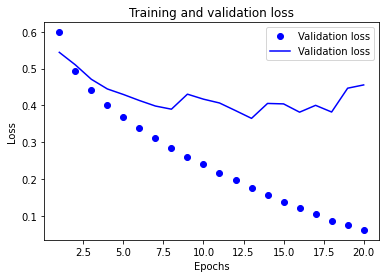

In [38]:
model = models.Sequential()
model.add(layers.Dense(4, activation='relu', input_shape=(LIMIT_WORD,)))
model.add(layers.Dense(4, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model = compile_model(model)
history = fit_model(model)
plot_loss(history)

Note how the model starts overfitting **much later** than the original one.

## Experiment 2

- Replace with a network with higher capacity

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 3s 233us/sample - loss: 0.5334 - binary_accuracy: 0.7633 - val_loss: 0.6334 - val_binary_accuracy: 0.7081
Epoch 2/20
15000/15000 [==============================] - 3s 200us/sample - loss: 0.2486 - binary_accuracy: 0.9004 - val_loss: 0.2721 - val_binary_accuracy: 0.8904
Epoch 3/20
15000/15000 [==============================] - 3s 202us/sample - loss: 0.1558 - binary_accuracy: 0.9447 - val_loss: 0.2974 - val_binary_accuracy: 0.8899
Epoch 4/20
15000/15000 [==============================] - 3s 210us/sample - loss: 0.0825 - binary_accuracy: 0.9709 - val_loss: 0.4623 - val_binary_accuracy: 0.8311
Epoch 5/20
15000/15000 [==============================] - 3s 207us/sample - loss: 0.0689 - binary_accuracy: 0.9819 - val_loss: 0.2877 - val_binary_accuracy: 0.8838
Epoch 6/20
15000/15000 [==============================] - 3s 215us/sample - loss: 0.0079 - binary_accuracy: 0.9995 - val_loss: 0.5

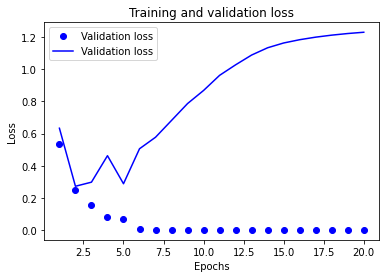

In [39]:
model = models.Sequential()
model.add(layers.Dense(512, activation='relu', input_shape=(LIMIT_WORD,)))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model = compile_model(model)
history = fit_model(model)
plot_loss(history)

The model starts overfitting immediately and more severely then the original one (picture below) and has a noisy training loss.

<img src="./resources/binary_class_model_validation_loss.png">

## Experiment 3

- Add **_weight regularization_**:
    - L1 regularizers make the added cost proportional to the _absolut_value_ of the weight coefficients;
    - L2 regularizers (weight decay), make the added cost proportional to the _square of the value_value_ of the weight coefficients;

#### Add L2 regularization to the original model

- `l2(0.001)` means that every coefficient in the matrix of the layer will add `0.001 * weight_coefficient_value` to the loss of the network at training time 

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 1s 94us/sample - loss: 0.5741 - binary_accuracy: 0.7795 - val_loss: 0.4537 - val_binary_accuracy: 0.8515
Epoch 2/20
15000/15000 [==============================] - 1s 67us/sample - loss: 0.3677 - binary_accuracy: 0.8966 - val_loss: 0.3569 - val_binary_accuracy: 0.8833
Epoch 3/20
15000/15000 [==============================] - 1s 60us/sample - loss: 0.2905 - binary_accuracy: 0.9172 - val_loss: 0.3468 - val_binary_accuracy: 0.8788
Epoch 4/20
15000/15000 [==============================] - 1s 60us/sample - loss: 0.2483 - binary_accuracy: 0.9348 - val_loss: 0.3367 - val_binary_accuracy: 0.8822
Epoch 5/20
15000/15000 [==============================] - 1s 60us/sample - loss: 0.2245 - binary_accuracy: 0.9405 - val_loss: 0.3257 - val_binary_accuracy: 0.8872
Epoch 6/20
15000/15000 [==============================] - 1s 60us/sample - loss: 0.2059 - binary_accuracy: 0.9477 - val_loss: 0.3334 - 

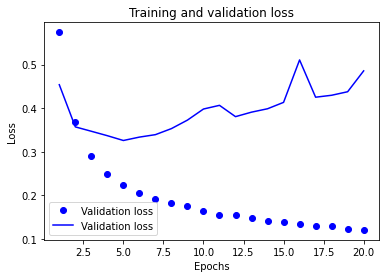

In [40]:
from tensorflow.keras import regularizers

model = models.Sequential()
model.add(layers.Dense(16, kernel_regularizer=regularizers.l2(0.001), activation='relu', input_shape=(LIMIT_WORD,)))
model.add(layers.Dense(16, kernel_regularizer=regularizers.l2(0.001), activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model = compile_model(model)
history = fit_model(model)
plot_loss(history)

The model has become much more resistant to overfitting than the original one (picture below). The experiment could be repeated using other _Keras_ regularizers like `l1(value)` or `l1_l2(l1=value, l2=value)`, to perform both simultaneously.
<img src="./resources/binary_class_model_validation_loss.png">

## Experiment 4

- Adding _dropout_. This technique consists in setting to 0 a random ratio of fetures of an activation matrix at training time. Adding noise can cotnribute to break up the learning of irrelevant patterns.

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 3s 185us/sample - loss: 0.6525 - binary_accuracy: 0.5931 - val_loss: 0.5817 - val_binary_accuracy: 0.7592
Epoch 2/20
15000/15000 [==============================] - 1s 54us/sample - loss: 0.5565 - binary_accuracy: 0.7310 - val_loss: 0.5001 - val_binary_accuracy: 0.7962
Epoch 3/20
15000/15000 [==============================] - 1s 53us/sample - loss: 0.4842 - binary_accuracy: 0.7995 - val_loss: 0.4206 - val_binary_accuracy: 0.8593
Epoch 4/20
15000/15000 [==============================] - 1s 54us/sample - loss: 0.4236 - binary_accuracy: 0.8437 - val_loss: 0.3550 - val_binary_accuracy: 0.8823
Epoch 5/20
15000/15000 [==============================] - 1s 55us/sample - loss: 0.3730 - binary_accuracy: 0.8739 - val_loss: 0.3308 - val_binary_accuracy: 0.8864
Epoch 6/20
15000/15000 [==============================] - 1s 54us/sample - loss: 0.3203 - binary_accuracy: 0.8953 - val_loss: 0.3211 -

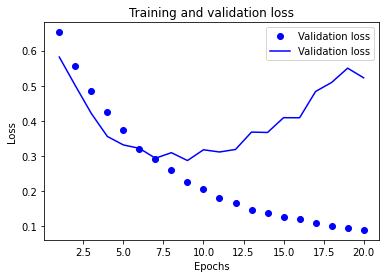

In [41]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(LIMIT_WORD,)))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))

model = compile_model(model)
history = fit_model(model)
plot_loss(history)

Dropout shows a clear improvement over the original model (see picture below)
<img src="./resources/binary_class_model_validation_loss.png">

## Conclusions
#### What to do in case of overfitting?
- Get more training data
- Reduce the capacity of the network
- Add weight regularization
- Add dropout